In [1]:
from jdaviz import SpecViz

specviz = SpecViz()
specviz.app

/home/erik/miniconda3/envs/jdaviz-dev2/lib/python3.8/site-packages/glue/external/echo/__init__.py:3: UserWarning: glue.external.echo is deprecated, import from echo directly instead
  warnings.warn('glue.external.echo is deprecated, import from echo directly instead')


Application(components={'g-viewer-tab': '<template>\n  <component :is="stack.container">\n    <g-viewer-tab\n …

Make two selections in a continuum area.

In [2]:
import specutils

spec_url = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=1323&mjd=52797&fiberid=12'
spec = specutils.Spectrum1D.read(spec_url, cache=True)

specviz.load_data(spec)

In [23]:
ss_groups = specviz.app.data_collection.subset_groups
subregs = []
for grp in ss_groups:
    ss = grp.subsets[0].subset_state
    subregs.append((ss.lo, ss.hi)*spec.spectral_axis.unit)
sr = specutils.SpectralRegion(subregs)
sr

Spectral Region, 2 sub-regions:
  (6058.0952340469885 Angstrom, 6461.5456718392925 Angstrom) 
  (7109.511526475417 Angstrom, 7995.879912534268 Angstrom)   

(0.0, 1000.0)

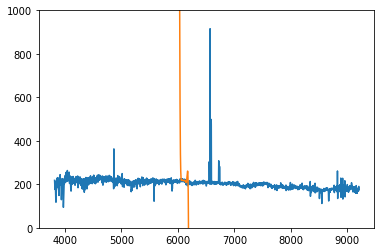

In [39]:
from astropy.modeling import models
from specutils import fitting

cmod = fitting.fit_lines(spec, models.Chebyshev1D(20), window=sr)

from matplotlib import pyplot as plt
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec.spectral_axis, cmod(spec.spectral_axis))
plt.ylim(0, 1000)

Need to show above in specviz...

That is *wrong*.  But assume it's right:

In [ ]:
contsub = spec - cmod(spec.spectral_axis)
specviz.add_data(contsub)

Make a line selection

In [40]:
specutils.analysis.line_flux(contsub, newsr)